In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
import numpy as np
from src.mask_pattern import LinePattern

In [3]:
from src import const
mask = LinePattern(cd=56, gap=80, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)

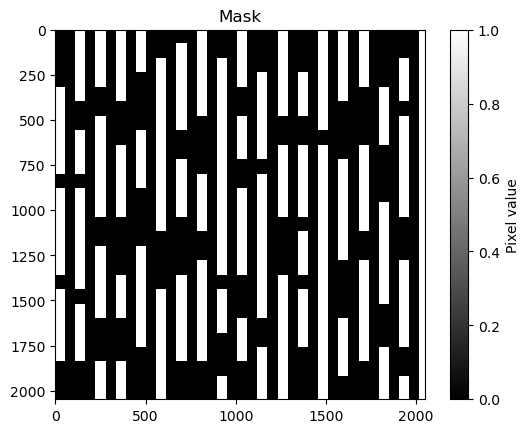

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [43]:
# TNB implementation
import numpy as np
from src import fourier

ampta = 0.95 + 0.0j
ampvc = 1.0 + 0.0j
famp = fourier.mask(mask, ampta, ampvc)
rfamp = np.maximum(np.log(np.abs(famp)) + 10, 0)

/tmp/ipykernel_418129/3836779744.py:8: RuntimeWarning: divide by zero encountered in log
  rfamp = np.maximum(np.log(np.abs(famp)) + 10, 0)


In [44]:
rfamp.shape, const.Mrange2

((301, 301), 301)

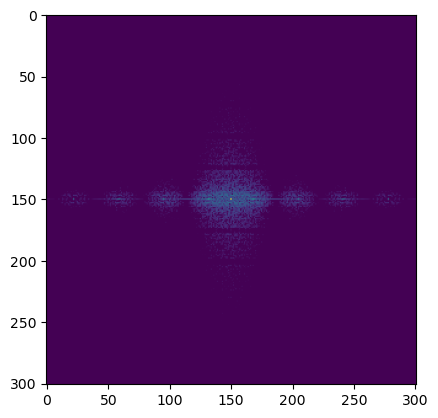

In [45]:
plt.imshow(rfamp)
plt.show()

In [31]:
def test_np_ver(pattern_mask: np.ndarray, ampta: complex, ampvc: complex): 
    meshX = const.FDIVX // const.NDIVX
    meshY = const.FDIVY // const.NDIVY

    pattern = np.where(
        np.kron(pattern_mask, np.ones((meshX, meshY))), ampta, ampvc
    ).astype(
        np.complex128
    )  # shape: (FDIVX, FDIVY)

    famp_full = np.fft.fftshift(np.fft.fft2(pattern)) / (const.FDIVX * const.FDIVY)

    # === 3. 周波数中心付近の領域を切り出す ===
    cx = const.FDIVX // 2
    cy = const.FDIVY // 2
    half_L = const.Lrange2 // 2
    half_M = const.Mrange2 // 2

    famp = famp_full[
        cx - half_L : cx + half_L + (const.Lrange2 % 2),
        cy - half_M : cy + half_M + (const.Mrange2 % 2)
    ]
    
    return famp

In [32]:
own_famp = test_np_ver(mask, ampta, ampvc)
own_rfamp = np.maximum(np.log(np.abs(own_famp)) + 10, 0)

/tmp/ipykernel_418129/3198047890.py:2: RuntimeWarning: divide by zero encountered in log
  own_rfamp = np.maximum(np.log(np.abs(own_famp)) + 10, 0)


In [33]:
own_rfamp.shape

(301, 301)

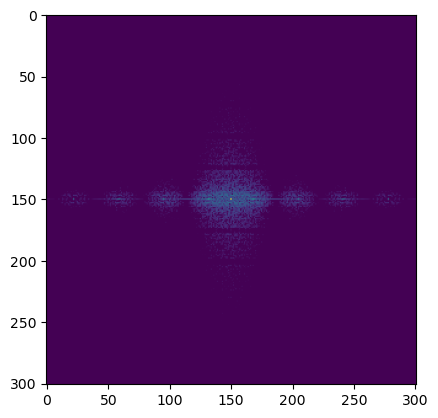

In [34]:
plt.imshow(own_rfamp)
plt.show()

In [42]:
np.allclose(rfamp, own_rfamp, atol=1e-6, rtol=1e-4)

True